In [1]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# 2. Load the wine quality dataset
# Make sure 'winequality-red.csv' is in the same folder as your notebook
df = pd.read_csv('winequality-red.csv', sep=';')

# Display the first five rows to verify
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 3. Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)  # Features: all columns except 'quality'
y = df['quality']               # Target: 'quality' column

# Optional: Convert wine quality to binary classification (good vs. not good)
# Here, wines with quality >= 7 are considered 'good' (1); others 'not good' (0)
y = (y >= 7).astype(int)

In [4]:
# 4. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# 5. Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# 6. Make predictions on the test set
y_pred = model.predict(X_test)

In [7]:
# 7. Evaluate model performance using accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.90


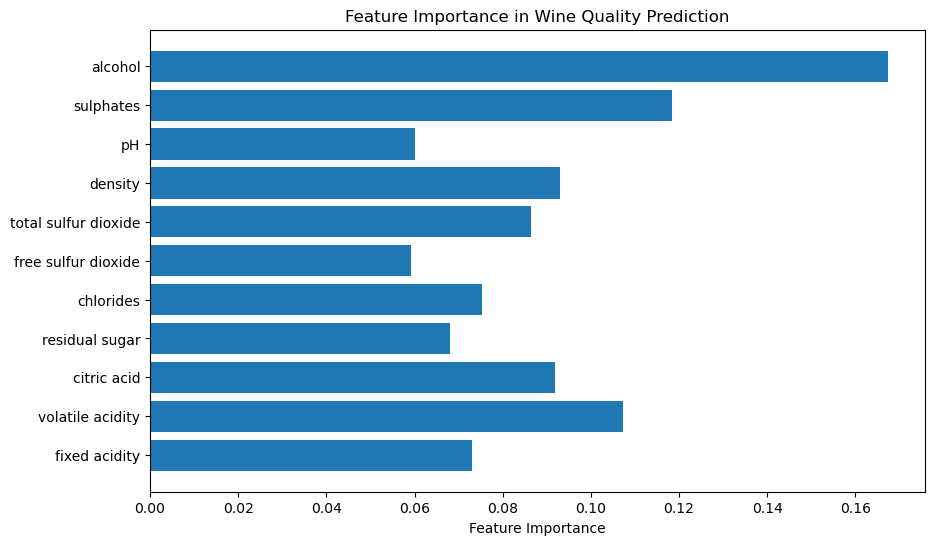

In [8]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Wine Quality Prediction")
plt.show()

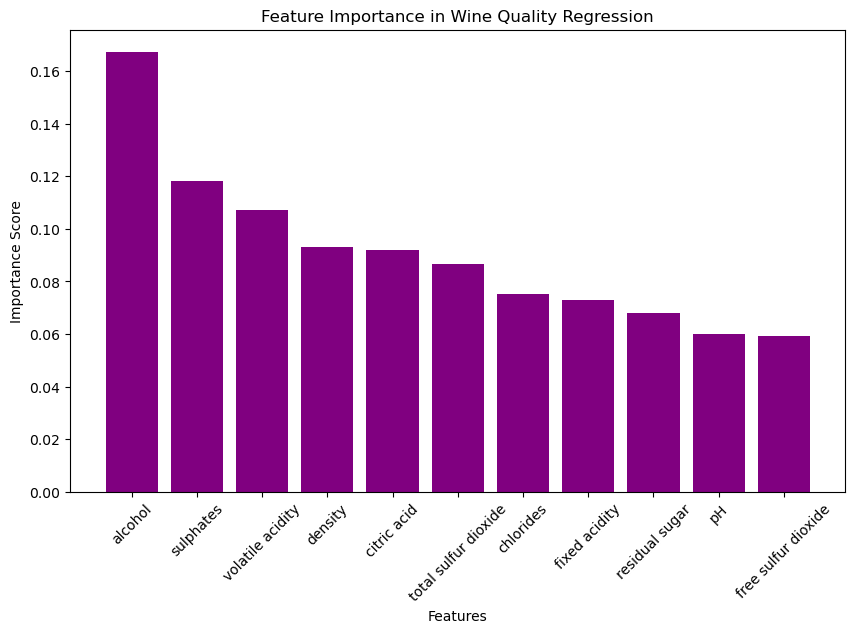

In [9]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar([feature_names[i] for i in indices], importances[indices], color='purple')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Wine Quality Regression")
plt.xticks(rotation=45)
plt.show()

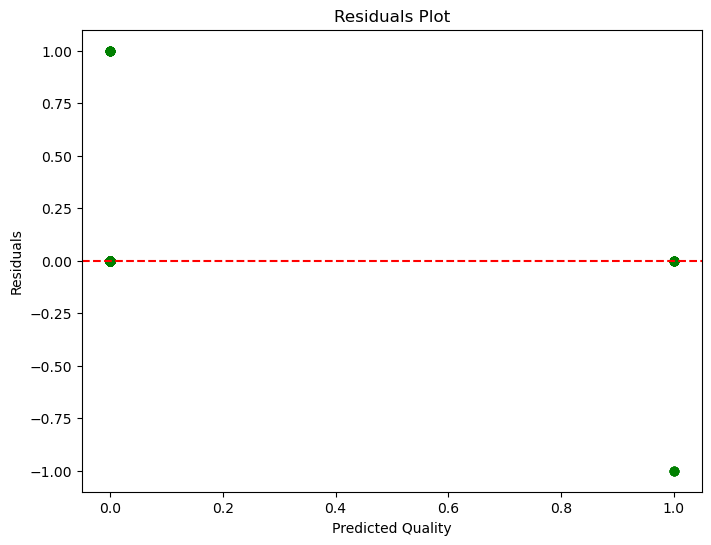

In [10]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()